In [241]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [242]:
!pip install kagglehub[pandas-datasets]

In [245]:
kagglehub.login()

In [244]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "log_temp.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "edotfs/dht11-temperature-and-humidity-sensor-1-day",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

<ipython-input-244-ca7ea3d8eb62>:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    3/14/19  19:33:07  T=22.0  H=20.0
0  3/14/19  19:38:10  T=22.0  H=20.0
1  3/14/19  19:43:11  T=22.0  H=26.0
2  3/14/19  19:48:14  T=22.0  H=26.0
3  3/14/19  19:53:15  T=22.0  H=20.0
4  3/14/19  19:58:15  T=22.0  H=23.0


In [248]:
df.to_csv('log_temp.csv', index=False)

In [253]:
df = pd.read_csv('log_temp.csv', header=None)
df.columns = ['date', 'timestamp', 'temperature', 'humidity']
df

,date,timestamp,temperature,humidity
0,3/14/19,19:33:07,T=22.0,H=20.0
1,3/14/19,19:38:10,T=22.0,H=20.0
2,3/14/19,19:43:11,T=22.0,H=26.0
3,3/14/19,19:48:14,T=22.0,H=26.0
4,3/14/19,19:53:15,T=22.0,H=20.0
...,...,...,...,...
331,3/15/19,23:48:51,T=18.0,H=28.0
332,3/15/19,23:53:51,T=18.0,H=22.0
333,3/15/19,23:58:52,T=18.0,H=22.0
334,3/16/19,0:03:52,T=18.0,H=22.0


In [254]:
df['temperature'] = pd.to_numeric(df['temperature'].str.replace("T=", "", regex=False), errors='coerce')
df['humidity'] = pd.to_numeric(df['humidity'].str.replace("H=", "", regex=False), errors='coerce')
df

,date,timestamp,temperature,humidity
0,3/14/19,19:33:07,22.0,20.0
1,3/14/19,19:38:10,22.0,20.0
2,3/14/19,19:43:11,22.0,26.0
3,3/14/19,19:48:14,22.0,26.0
4,3/14/19,19:53:15,22.0,20.0
...,...,...,...,...
331,3/15/19,23:48:51,18.0,28.0
332,3/15/19,23:53:51,18.0,22.0
333,3/15/19,23:58:52,18.0,22.0
334,3/16/19,0:03:52,18.0,22.0


In [256]:
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['timestamp'])
df

<ipython-input-256-b901787b2037>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['timestamp'])


,date,timestamp,temperature,humidity,datetime
0,3/14/19,19:33:07,22.0,20.0,2019-03-14 19:33:07
1,3/14/19,19:38:10,22.0,20.0,2019-03-14 19:38:10
2,3/14/19,19:43:11,22.0,26.0,2019-03-14 19:43:11
3,3/14/19,19:48:14,22.0,26.0,2019-03-14 19:48:14
4,3/14/19,19:53:15,22.0,20.0,2019-03-14 19:53:15
...,...,...,...,...,...
331,3/15/19,23:48:51,18.0,28.0,2019-03-15 23:48:51
332,3/15/19,23:53:51,18.0,22.0,2019-03-15 23:53:51
333,3/15/19,23:58:52,18.0,22.0,2019-03-15 23:58:52
334,3/16/19,0:03:52,18.0,22.0,2019-03-16 00:03:52


In [257]:
df.isna().sum()

,0
date,0
timestamp,0
temperature,16
humidity,16
datetime,0


In [259]:
df.dropna(inplace=True)

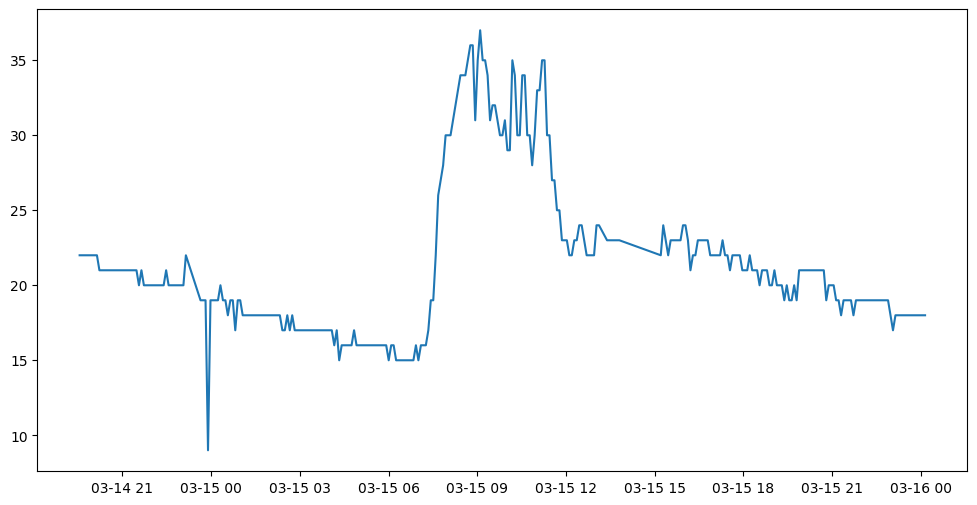

In [261]:
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['temperature'], label='Temperature')

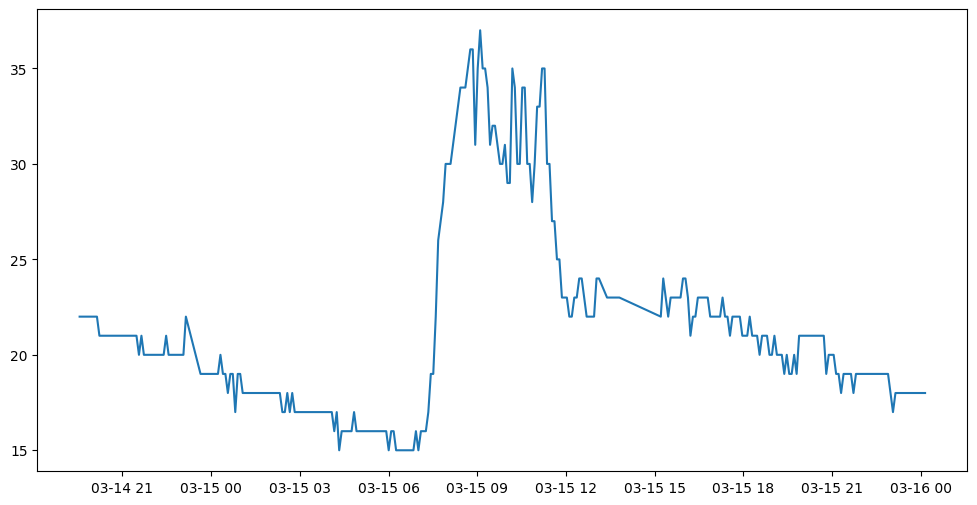

In [262]:
filtered_df = df[(df['temperature'] > 10)]
df = filtered_df
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['temperature'], label='Temperature')

In [263]:
df['t_smooth'] = df['temperature'].rolling(window=5).mean()
df

<ipython-input-263-0d9a7a9677a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['t_smooth'] = df['temperature'].rolling(window=5).mean()


,date,timestamp,temperature,humidity,datetime,t_smooth
0,3/14/19,19:33:07,22.0,20.0,2019-03-14 19:33:07,NaN
1,3/14/19,19:38:10,22.0,20.0,2019-03-14 19:38:10,NaN
2,3/14/19,19:43:11,22.0,26.0,2019-03-14 19:43:11,NaN
3,3/14/19,19:48:14,22.0,26.0,2019-03-14 19:48:14,NaN
4,3/14/19,19:53:15,22.0,20.0,2019-03-14 19:53:15,22.0
...,...,...,...,...,...,...
331,3/15/19,23:48:51,18.0,28.0,2019-03-15 23:48:51,18.0
332,3/15/19,23:53:51,18.0,22.0,2019-03-15 23:53:51,18.0
333,3/15/19,23:58:52,18.0,22.0,2019-03-15 23:58:52,18.0
334,3/16/19,0:03:52,18.0,22.0,2019-03-16 00:03:52,18.0


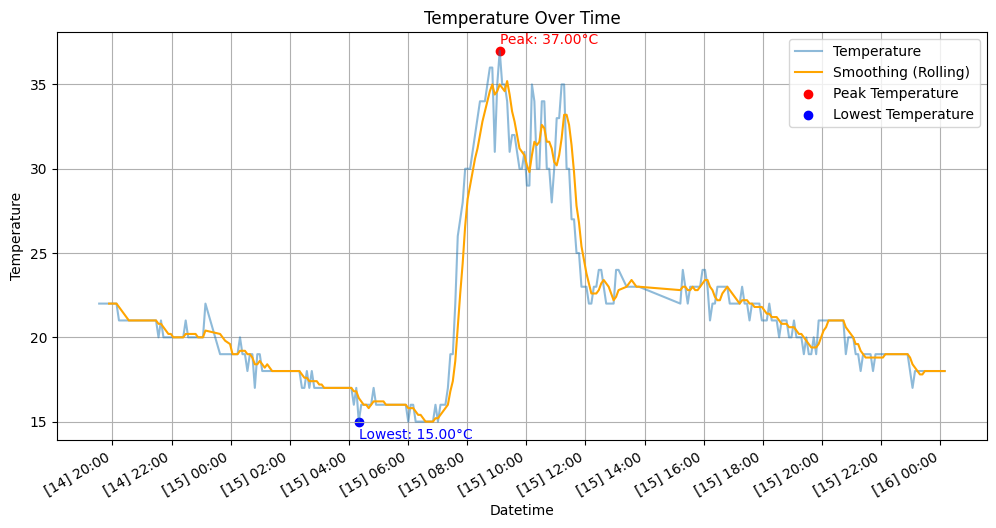

In [273]:
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['temperature'], alpha=0.5, label='Temperature')
plt.plot(df['datetime'], df['t_smooth'], label='Smoothing (Rolling)', color='orange')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('[%d] %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))
plt.gcf().autofmt_xdate()

peak_row = df.loc[df['temperature'].idxmax()]
low_row = df.loc[df['temperature'].idxmin()]

plt.scatter(peak_row['datetime'], peak_row['temperature'], color='red', label='Peak Temperature')
plt.scatter(low_row['datetime'], low_row['temperature'], color='blue', label='Lowest Temperature')

plt.text(peak_row['datetime'], peak_row['temperature'] + 0.4, f'Peak: {peak_row["temperature"]:.2f}°C', color='red')
plt.text(low_row['datetime'], low_row['temperature'] - 1, f'Lowest: {low_row["temperature"]:.2f}°C', color='blue')

plt.xlabel('Datetime')
plt.ylabel('Temperature')
plt.title('Temperature Over Time')
plt.grid(True)
plt.legend()


In [274]:
def explain_temp(temp):
  if temp>30:
    return f"High Temperature or potential high spike"
  elif temp<20:
    return f"Low Temperature or potential low spike"
  else:
    return f"Normal Temperature"

df['explain_temp'] = df['temperature'].apply(explain_temp)
df

<ipython-input-274-cd28695065d4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['explain_temp'] = df['temperature'].apply(explain_temp)


,date,timestamp,temperature,humidity,datetime,t_smooth,explain_temp
0,3/14/19,19:33:07,22.0,20.0,2019-03-14 19:33:07,NaN,Normal Temperature
1,3/14/19,19:38:10,22.0,20.0,2019-03-14 19:38:10,NaN,Normal Temperature
2,3/14/19,19:43:11,22.0,26.0,2019-03-14 19:43:11,NaN,Normal Temperature
3,3/14/19,19:48:14,22.0,26.0,2019-03-14 19:48:14,NaN,Normal Temperature
4,3/14/19,19:53:15,22.0,20.0,2019-03-14 19:53:15,22.0,Normal Temperature
...,...,...,...,...,...,...,...
331,3/15/19,23:48:51,18.0,28.0,2019-03-15 23:48:51,18.0,Low Temperature or potential low spike
332,3/15/19,23:53:51,18.0,22.0,2019-03-15 23:53:51,18.0,Low Temperature or potential low spike
333,3/15/19,23:58:52,18.0,22.0,2019-03-15 23:58:52,18.0,Low Temperature or potential low spike
334,3/16/19,0:03:52,18.0,22.0,2019-03-16 00:03:52,18.0,Low Temperature or potential low spike


In [275]:
df.to_csv('final_result_.csv', index=False)